## Libraries

In [1]:
import math # for sqrt, log, exponentials
import numpy as np # for vectorization and array
import random # for random simulation
import pandas as pd # for dataframe visualization
import matplotlib.pyplot as plt # for plotting data in a graph
import copy # for making predictions
from collections import OrderedDict # ordering dictionaries
import warnings # no annoying warnings

warnings.filterwarnings('ignore') # to ignore numpy's warnings

In [ ]:
def sigmoid_prediction(x_data, extra_features = False):
    """
    Purpose - calculates the sigmoid vector 
    for an given x vector
    
    Parameters:
    x_data - an ndarray of shape (number of features x number of data points)
    
    extra_features - a boolean that tell us 
    to use the sigmoid model with extra random features
    
    Returns:
    prediction_vector - an ndarray of shape (1 x number of data points)
    """
    
    # only selecting the first 5 features from our data to use in the model
    x1 = x_data[:, 0]
    x2 = x_data[:, 1]
    x3 = x_data[:, 2]
    x4 = x_data[:, 3]
    x5 = x_data[:, 4]
    
    model = (0.90 * x1) + (0.81 * x2) + (0.729 * x3) + (0.6561 * x4) + (0.59049 * x5)
    
    if extra_features == True:
        
        # adding the extra features (for testing)
        x6 = x_data[:, 5]
        x7 = x_data[:, 6]
        x8 = x_data[:, 7]
        
        # adding irrelevant features that were not used to
        # generate the output
        model += (x6 * 0.85) + (x7 * 0.92) + (x8 * 1)
    
    prediction_vector = 1 / (1 + (math.e ** -model))

    return prediction_vector

def generate_data_point(sigma = 0.05, extra_features = False):
    """
    Purpose:
    Generates a data point of at 15 dimensions
    and and output value.
    
    Parameters:
    dimensions - an integer greater equal to 15 and determines 
    the number of features in the datapoint
    method - to specify how we generate our data
    extra_features - a boolean that tell us 
    to use the sigmoid model with extra random features
    
    sigma - a float number that alters our output, and adds more 
    noise (this should hinder the performance of our model)
    
    Returns:
    feature_vector - a list with a length of (dimensions + 1)
    where all elements are features
    
    Y - our desired output based of the five first features (integer)
    """
    
    # defualt generated features, for 15 dimensions
    feature_vector = [np.random.choice([1,-1], p = [0.50,0.50]) for _ in range(0,15)]
    
    # unpacking the first few values used for Y (output)
    x1 = feature_vector[0]
    x2 = feature_vector[1]
    x3 = feature_vector[2]
    x4 = feature_vector[3]
    x5 = feature_vector[4]
    
    # getting our desired Y, outout
    Y = (0.90 * x1) + (0.81 * x2) + (0.729 * x3) + (0.6561 * x4) + (0.59049 * x5) + np.random.normal(0,sigma**2)
    
    if extra_features == True:
        
        # adding the extra features (for testing)
        x6 = feature_vector[5]
        x7 = feature_vector[6]
        x8 = feature_vector[7]
        
        # adding irrelevant features that were not used to
        # generate the output
        Y += (x6 * 0.85) + (x7 * 0.92) + (x8 * 1)
    
    Y = np.sign(Y)
    return feature_vector, Y

def generate_test_train_data_sets(training_data_size = 5000, testing_data = 500, sigma = 0.05, extra_features = False):
    """
    Purpose:
    To use the generate_data_point function to generate training
    data and testing_data
    
    Parameters:
    training_data_size - an integer specifying how many training data points
    you would like to generate
    method - to specify how we generate our data
    testing_data - an integer telling us how many testing data points
    we would like to generate
    extra_features - a boolean that tell us 
    to use the sigmoid model with extra random features
    
    sigma - a float number that alters our output
    
    Returns:
    x_train - ndarray with shape of (dimensions x number of data points)
    y_train - an ndarray vector with a shape of (1 x number of data points)
    
    x_test - ndarray with shape of (dimensions x number of data points)
    y_test - an ndarray vector with a shape of (1 x number of data points)
    """
    
    # intialize our test and training data
    training_data = []
    test_data = []
    
    # generating the training data
    for _ in range(0,training_data_size):
        training_data.append(generate_data_point(sigma,extra_features))
        
    # generating testing data
    for _ in range(0,testing_data):
        test_data.append(generate_data_point(sigma,extra_features))
    
    # putting our generated data into a numpy ndarray
    x_train = np.stack([x[0] for x in training_data])
    # applying the sign function
    y_train = np.stack([x[1] for x in training_data])
    
    x_test = np.stack([x[0] for x in test_data])
    # applying the sign function
    y_test = np.stack([x[1] for x in test_data])
    
    return x_train, y_train, x_test, y_test

def IG(x_data,y_data,feature_number):
    """
    Parameters:
    x_data - ndarray with shape of (dimensions x number of data points)
    y_data - an ndarray vector with a shape of (1 x number of data points)
    feature_number - an integer giving us the i-th feature to evaluation
    
    Returns:
    IG (Information Gain) - a float number
    that represents on average the number of bits we need
    to express Y
    
    Purpose:
    To calculate information gain for each feature
    and find what we should split next on
    
    ************
    *********
    *******
    This code is vectorized, which means
    it takes advantage of broadcasting with numpy 
    and we can calculate the information gain on any feature
    incredibly fast.
    *******
    *********
    ***********
    
    """

    # what feature are we calculating information gain for?
    feature_i = x_data[:, feature_number]

    # number of +1 and number of -1
    number_of_positive = len(np.where(y_data == 1)[0])
    number_of_negative = len(np.where(y_data == -1)[0])
    total = number_of_positive + number_of_negative

    # using vectorization for fast compuatation
    H_Y_probs = np.array(number_of_positive * [number_of_positive/total] + number_of_negative * [number_of_negative/total])
    H_Y = -1 * np.sum(np.log2(H_Y_probs) * H_Y_probs)

    # all the below code is the process of vectorization
    # this allows for incredibly fast computation among our generated data set
    length_y_data = len(y_data)
    arr1 = np.array(y_data)
    p_x_positive_one = len(np.where(feature_i == 1)[0]) / length_y_data
    p_x_negative_one = len(np.where(feature_i == -1)[0]) / length_y_data

    arr1[arr1 == -1] = p_x_negative_one
    arr1[arr1 == 1] = p_x_positive_one

    feature_pos = len(np.where(feature_i == 1)[0])
    feature_neg = length_y_data - feature_pos

    # vectorization for all possibilities 2^n, n = 2, 2^2 = 4
    pos_pos = len(np.where((y_data == 1) & (feature_i == 1))[0]) / feature_pos
    neg_neg = len(np.where((y_data == -1) & (feature_i == -1))[0]) / feature_neg
    pos_neg = len(np.where((y_data == 1) & (feature_i == -1))[0]) / feature_neg
    neg_pos = len(np.where((y_data == -1) & (feature_i == 1))[0]) / feature_pos

    # more vectorization...
    arr2 = np.array(y_data)
    arr2 = np.where((y_data == 1) & (feature_i == 1), pos_pos, arr2)
    arr2 = np.where((y_data == -1) & (feature_i == -1), neg_neg, arr2)
    arr2 = np.where((y_data == 1) & (feature_i == -1), pos_neg, arr2)
    arr2 = np.where((y_data == -1) & (feature_i == 1), neg_pos, arr2)

    # combining our vectorized arrays
    H_Y_GIVEN_X_probs = arr1 * arr2

    # fast vectorization calculations, finding bits of information
    H_Y_GIVEN_X = -1 * np.sum(np.log2(H_Y_GIVEN_X_probs) * H_Y_GIVEN_X_probs)

    # extracting our values to get the information gain
    IG = H_Y - H_Y_GIVEN_X
    
    # returning the information gain
    return IG

# this is a global variable so we can 
# easily access it during training
irrelevant_features = 0
def get_best_feature(x_data,y_data, depth):
    """
    Parameters:
    x_data - ndarray of shape (dimensions x number of training samples)
    y_data - ndarray of shape (1 x number of training samples)
    depth - an integer that tells us which feature we should split on
    
    Returns:
    feature_index - an integer representing the feature
    we should split on next in our decision tree
    
    Purpose:
    To pick a feature with the highest information gain to split
    on in our decision tree
    """

    global irrelevant_features
    
    number_of_features = x_train.shape[1]
    
    IG_dict = dict()
    for feature_number in range(0,number_of_features):
        IG_dict[IG(x_data,y_data,feature_number)] = feature_number
    
    # getting the max value key and searching for the 
    # feature number that is most correlated with it
    # then returning that number
    
    sorted_IG_dict = dict(OrderedDict(sorted(IG_dict.items(), reverse = True)))
    feature_to_split_on = list(sorted_IG_dict.keys())[(depth % 15)] # mod 15 because we have 15 features
    
    to_split = sorted_IG_dict[feature_to_split_on]
    
    # greater than the 5th indexed feature
    if to_split > 4:
        irrelevant_features += 1
    
    return to_split
    
def split_data(x_data,y_data,depth,alpha = 0):
    """
    Purpose: To split our x_data and y_data into two separate
    parts based on the given data
    
    Parameters:
    x_data - ndarray of shape (dimensions x number of training samples)
    y_data - ndarray of shape (1 x number of training samples)
    alpha - an integer equal to zero. We split on zero because we are focused on binary classification
    where our output is either +1 or -1
    
    Returns:
    x_data_right = ndarray of shape (dimensions x number of training samples)
    x_data_left = ndarray of shape (dimensions x number of training samples)
    y_data_right - ndarray of shape (1 x number of training samples)
    y_data_left - ndarray of shape (1 x number of training samples)
    
    most_correlated_feature - an integer telling us what variable we split on
    """
    
    most_correlated_feature = get_best_feature(x_train,y_train, depth)
    
    # selecting the feature based on most_correlated_feature
    feature_i = x_data[:, most_correlated_feature]
    
    # splitting our data
    x_data_right = x_data[feature_i < alpha]
    x_data_left = x_data[feature_i > alpha]
    
    y_data_right = y_data[feature_i < alpha]
    y_data_left = y_data[feature_i > alpha]
    
    # returning all the values
    return (x_data_right, x_data_left, y_data_right, y_data_left,
    most_correlated_feature)

def build_branches(branch, max_sample_size, max_depth, depth = 0):
    """
    Purpose: 
    Recursively builds the branches of our
    decision tree.
    
    Parameters:
    branch - current leaf node of the tree to build on
    max_sample_size - an integer giving us a sample size to stop building the tree
    max_depth - an integer representing the maximal depth for the tree to grow to    
    depth - an integer set to zero, keeps track of the total depth of the tree

    Returns:
    None
    """
    # splitting the data and returning both sides (R/L) and the splitted feature
    x_data_right, x_data_left, y_data_right, y_data_left, feature = split_data(branch["x_data"],branch["y_data"], depth)
    
    # this ensures the tree does not have an odd sample size
    # we can limit the sample size of the tree
    # we can limit the tree depth
    if ((len(y_data_left) > max_sample_size or len(y_data_right) > max_sample_size) and depth <= max_depth):
        
        branch["feature"] = feature # this tells us how we traverse our tree based on a given feature, when making predictions
        branch["depth"] = depth # the current depth of the tree, starts at d = 0.
        branch["R"] = {"x_data":x_data_right,"y_data":y_data_right} # adds the right branch
        branch["L"] = {"x_data":x_data_left,"y_data":y_data_left} # adds a left branch
        
        depth += 1 # adding a depth because we just built an extra branch   
        
        build_branches(branch["R"], max_sample_size, max_depth, depth)
        build_branches(branch["L"], max_sample_size, max_depth, depth)
        
def build_classification_tree(x_data, y_data, max_sample_size, max_depth = 999):
    """
    Purpose:
    This function builds our decision tree with our given
    input data of d-dimensions and output data
    
    Parameters:
    x_data - ndarray of shape (dimensions x number of training samples)
    y_data - ndarray of shape (1 x number of training samples)
    
    max_sample_size - an integer giving us a sample size to stop building the tree
    max_depth - an integer representing the maximal depth for the tree to grow to, by default
    this value is 999 if no max_depth is specified
    
    Returns:
    tree - a dictionary which is our decision tree
    """

    # our decision tree
    tree = dict()

    # initial tree
    tree["x_data"] = x_train
    tree["y_data"] = y_train
    
    # building the branches recursively
    build_branches(tree, max_sample_size, max_depth)
        
    # returning our decision tree
    return tree

def make_predictions(decision_tree, x_data, y_data, method):
    """
    Purpose:
    To make predictions on the test data
    from the given decision tree
    
    Paramters:
    decisions_tree - a dictionary of our built decision tree
    x_data - ndarray of shape (dimensions x number of training samples)
    y_data - ndarray of shape (1 x number of training samples)
    method - to specify classification 
    Returns:
    accuracy - a float representing our accuracy for our given
    test data
    """
    method = method.lower().strip()
    
    # q holds the number of correct guesses
    q = 0
    
    # if our method is logistic regression
    probabilities = []
    
    for i in range(0,len(y_data)):
        
        # getting our prediction
        x_prediction = x_data[i]
        
        # making a copy of the tree and storing it in 
        # another variable
        branch = copy.deepcopy(decision_tree)
        
        # we jump out of this while loop
        # when we have reached a terminal leaf node
        while branch.get("R") != None:
            
            feature_to_traverse = branch['feature']
            feature_prediction = x_prediction[feature_to_traverse]

            # decides which branch we should go down
            if feature_prediction == 1:
                branch = branch["L"]
            elif feature_prediction == -1:
                branch = branch["R"]

        if method == 'classification':
            # picking the majority of the ones and negative ones on the leaf nodes
            if len(branch['y_data'][branch['y_data'] == 1]) > len(branch['y_data'][branch['y_data'] == -1]):
                y_prediction = 1
            else:
                y_prediction = -1

            # increment our counter by one if our guess is correct
            if y_prediction == y_data[i]:
                q += 1
                
    if method == 'classification':
        accuracy = q / len(y_data)
        return accuracy

        
def compute_logistic_error(w_vector, x_data, y_data):
    """
    Parameters: 
    w_vector - the weights learned by the model to guess the output y_data
    x_data ndarray of shape (15 x number of data points)
    y_data - ndarray of shape (1 x number of training samples)
    
    Returns:
    The logistic error of the probabilities
    
    Purpose:
    To calculate the logistic error for a dataset
    """
    # taking the dot product 
    probabilities = np.dot(x_data,w_vector)
    
    # making sure these are ndarrays
    probabilities = np.array(probabilities)
    y_data = np.array(y_data)
    
    # changing all -1 to 0 for the calculation
    y_data[y_data == -1] = 0
    
    # logistic error formula vectorized
    to_sum = (-1 * y_data * np.log(probabilities)) - ((1 - y_data) * np.log(1 - probabilities))

    # removing any -inf, inf, or nans
    to_sum = to_sum[~np.isnan(to_sum)] 
    to_sum = to_sum[np.isfinite(to_sum)]

    # we cannot calculate an error
    if len(to_sum) == 0:
        return 0
    
    error = (1/len(to_sum)) * np.sum(to_sum)
    
    return error

σ = 0.05


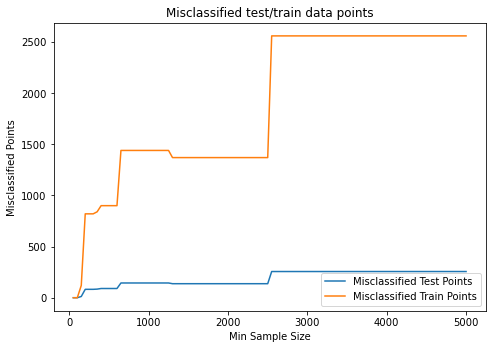

In [13]:
# generating our train and test sets
x_train, y_train, x_test, y_test = generate_test_train_data_sets(training_data_size = 5000, testing_data = 500, sigma = 0.05)

misclassified_test_points_list = []
misclassified_train_points_list = []

# these sample sizes are all odd and it is equal to {4999, 4949, 4899, 4849, ... , 49}
sample_sizes = np.array(list(range(5000,0,-50))) - 1
# training our decision tree
for max_sample_size in sample_sizes:
    decision_tree = build_classification_tree(x_train, y_train, max_sample_size = max_sample_size)

    # evaluating metrics
    test_accuracy = make_predictions(decision_tree, x_test, y_test, method = "classification")
    train_error = make_predictions(decision_tree, x_train, y_train, method = "classification")

    test_error = 1 - test_accuracy
    train_error = 1 - test_accuracy

    misclassified_test_points = int(test_error * 500)
    misclassified_train_points = int(train_error * 5000)
    
    misclassified_test_points_list.append(misclassified_test_points)
    misclassified_train_points_list.append(misclassified_train_points)

print("σ = 0.05")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(sample_sizes,misclassified_test_points_list, label = "Misclassified Test Points")
ax.plot(sample_sizes,misclassified_train_points_list, label = "Misclassified Train Points")
ax.legend()
ax.legend(loc = 'lower right')
ax.set_title("Misclassified test/train data points")
ax.set_ylabel("Misclassified Points")
ax.set_xlabel("Min Sample Size")
plt.show()

<br>The following summary of the data was based off a data set with very little noise ($\sigma = 0.05$).
<br>The above graph shows how we decrease our minimum sample size our misclassifications approaches zero.
<br>The ```optimal sample size is 149``` for my data, since this is the first sample size where we get zero misclassifications for our train and test sets.

The code below using the sample size $s$, and an increasing $\sigma$ for our generated test and train data sets. 

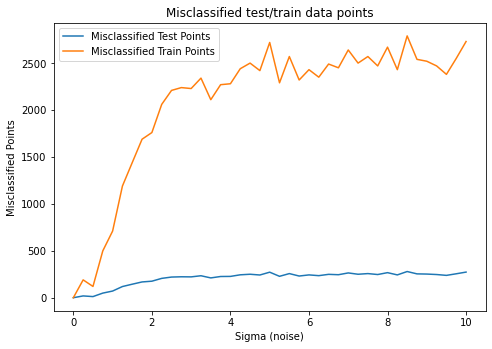

In [5]:
# sigmas {0,0.25,0.50,0.75,...,10}
sigmas = np.array(range(0,1025,25)) / 100

misclassified_test_points_list = []
misclassified_train_points_list = []

# these sample sizes are all odd and it is equal to 4999, 4949, 4899, 4849, ... , 49
# training our decision tree
for sigma in sigmas:
    
    # generating our train and test sets
    x_train, y_train, x_test, y_test = generate_test_train_data_sets(training_data_size = 5000, testing_data = 500, sigma = sigma)
    
    # building the decision tree
    decision_tree = build_classification_tree(x_train, y_train, max_sample_size = 149)

    # evaluating metrics
    test_accuracy = make_predictions(decision_tree, x_test, y_test, method = "classification")
    train_error = make_predictions(decision_tree, x_train, y_train, method = "classification")

    test_error = 1 - test_accuracy
    train_error = 1 - test_accuracy

    misclassified_test_points = int(test_error * 500)
    misclassified_train_points = int(train_error * 5000)
    
    misclassified_test_points_list.append(misclassified_test_points)
    misclassified_train_points_list.append(misclassified_train_points)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(sigmas,misclassified_test_points_list, label = "Misclassified Test Points")
ax.plot(sigmas,misclassified_train_points_list, label = "Misclassified Train Points")
ax.legend()
ax.legend(loc = 'upper left')
ax.set_title("Misclassified test/train data points")
ax.set_ylabel("Misclassified Points")
ax.set_xlabel("Sigma (noise)")
plt.show()

As $\sigma$ grows the noise on the data set becomes larger and the less accruate we are.
<br>If we imagine the *noisiest* data set, then the accruacy for our train and test data sets settle around 0.50. 
<br>This would mean we start to have around 2500 misclassified data points for our train data, and 250 misclassified data points for our test data.

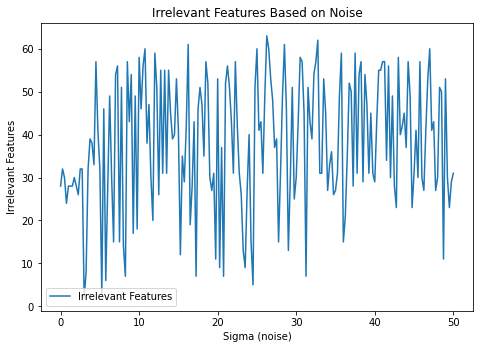

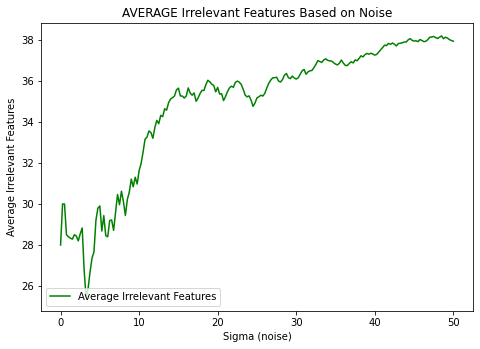

In [6]:
# sigmas {0,0.25,0.50,0.75,...,50}
sigmas = np.array(range(0,5025,25)) / 100
irrelevant_features_list = []

# these sample sizes are all odd and it is equal to 4999, 4949, 4899, 4849, ... , 49
# training our decision tree
for sigma in sigmas:
    
    # setting this to zero for every new sigma
    irrelevant_features = 0
    
    # generating our train and test sets
    x_train, y_train, x_test, y_test = generate_test_train_data_sets(training_data_size = 5000, testing_data = 500, sigma = sigma)
    
    # building the decision tree
    decision_tree = build_classification_tree(x_train, y_train, max_sample_size = 149)

    irrelevant_features_list.append(irrelevant_features)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(sigmas,irrelevant_features_list, label = "Irrelevant Features")
ax.legend()
ax.legend(loc = 'lower left')
ax.set_title("Irrelevant Features Based on Noise")
ax.set_ylabel("Irrelevant Features")
ax.set_xlabel("Sigma (noise)")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(sigmas,[np.mean(irrelevant_features_list[:i+1]) for i in range(0,len(sigmas))], label = "Average Irrelevant Features", color = 'green')
ax.legend()
ax.legend(loc = 'lower left')
ax.set_title("AVERAGE Irrelevant Features Based on Noise")
ax.set_ylabel("Average Irrelevant Features")
ax.set_xlabel("Sigma (noise)")
plt.show()

# Stochastic Gradient Descent

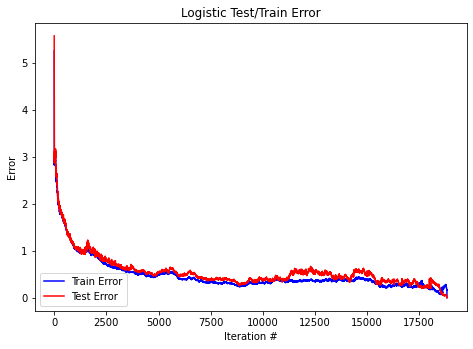

In [30]:
# generating test and train datasets
x_train, y_train, x_test, y_test = generate_test_train_data_sets(training_data_size = 5000, testing_data = 500, sigma = 0.05)
y_train_sigmoid = sigmoid_prediction(x_train)

# making a random guess [0,0,0,...,0]
w_vector = np.zeros(15)

# hyperparamters - learning rate
alpha = 0.001

# let's keep track of the errors
errors = {"Train Error": [], "Test Error": []}

iteration = 0
while True:
    iteration += 1
    
    # The stochastic part of gradient descent 
    # randomly chosing one data point
    random_index = random.randint(1,len(x_train)-1)
    f_xi = y_train_sigmoid[random_index]
    y_i = y_train[random_index]
    x_i = x_train[random_index]

    # performing an update on the w_vector
    w_vector = w_vector - (alpha * (f_xi - y_i)) * x_i 
    
    # gathering erros
    train_error = compute_logistic_error(w_vector, x_train, y_train)
    test_error = compute_logistic_error(w_vector, x_test, y_test)
        
    # we have reach convergence
    if test_error == 0 or train_error == 0:
        errors["Train Error"].append(0)
        errors["Test Error"].append(0)
        break
    else:
        errors["Train Error"].append(train_error)
        errors["Test Error"].append(test_error)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(errors["Train Error"], label = "Train Error", color = 'blue')
ax.plot(errors["Test Error"], label = "Test Error", color = 'red')
ax.set_title("Logistic Test/Train Error")
ax.set_ylabel("Error")
ax.set_xlabel("Iteration #")
ax.legend(loc = 'lower left')
plt.show()

At the start of training we can see that the crucial parts of the weights are learned, and drastically minimizes the error.

In [32]:
print("Learned w vector (w star): " + str(w_vector))
print("\nThe average of the first 5 (relevent weights) is: " + str(np.mean(w_vector[:5])))
print("The average of the last 10 (irrelevent weights) is: " + str(np.mean(w_vector[5:])))

Learned w vector (w star): [ 3.61956802  4.24009787  4.85269796  5.45800313  5.05647965  0.3306203
  0.20460886 -0.3005673   0.18692331  0.12664507 -0.04927399 -0.05990214
  0.07100711 -0.0515506  -0.08897082]

The average of the first 5 (relevent weights) is: 4.64536932573408
The average of the last 10 (irrelevent weights) is: 0.036953979399902935


It does not seem like there is an overfitting issue here.
<br>Our ```w_vector``` consists of very low weights, which is a good sign that shows we are not as much of a risk to *overfit.*
<br>Also, our first five features in the w_vector are the highest, and the ten other features are lower (close to zero).
<br>This makes sense because these ten other features are not specifically defined in the model, unlike the first five features, and their influence should not be as important for our predictions.

One decision tree model has 100% accuracy with no or little noise $(\sigma = 0.05)$ with majority vote.
<br>However, a decision tree that predicts the class value of $+1$ or $-1$ by majority vote is a hard classifier.
<br>These predictions do not give us any 'confidence' level, it only tells us the class value. 
<br>So it might be hard to generalize the hard classifier to data it has never seen before.
<br><br>On the other hand, we can output the probability the following class value as $+1$, and we would also know the probability of the class value being $-1$.
<br>This is a soft classifier, and we can easily express our confidence in a data point belonging to a specific class.
<br>Our accuracy for this model is not 100%, but it tells us how confident we are in our predictions.
<br><br>Moreover, we used the sigmoid function as our model to output a prediction of the class value being $+1$.
<br>Note, the sigmoid model is also a soft classifier, this allows us to model our confidence in our predictions.
<br><br>The best model to model data would NOT be the hard classifier because it does not give us information about how confident we are in our predictions.
<br>Now, it is between the two soft classifiers (decision tree - not majority vote AND sigmoid/logistic model). 
<br>Although the decision tree was split on based on the *information gain*, the logistic model weights were carefully learned by stochastic gradient descent.
<br>*Stochastic gradient descent* will learn which weights are more relevent than others, and consider all weights/features at the same time.
<br>With the decision tree the information gain is limited to how much it can learn because we only consider one feature at a time.
<br>**The logistic model produces weights that tell us how important each feature is in our dataset, and the decision tree does not.**
<br><br>```Thus, the logistic model is best for modeling data and minimizing the influence of irrelevant features.```
<br><br>We can measure the minimization of irrelevant features by looking at the data below:

In [33]:
print("Learned w vector (w star): " + str(w_vector))
print("\nThe average of the first 5 (relevent weights) is: " + str(np.mean(w_vector[:5])))
print("The average of the last 10 (irrelevent weights) is: " + str(np.mean(w_vector[5:])))

Learned w vector (w star): [ 3.61956802  4.24009787  4.85269796  5.45800313  5.05647965  0.3306203
  0.20460886 -0.3005673   0.18692331  0.12664507 -0.04927399 -0.05990214
  0.07100711 -0.0515506  -0.08897082]

The average of the first 5 (relevent weights) is: 4.64536932573408
The average of the last 10 (irrelevent weights) is: 0.036953979399902935
